In [1]:
# Importing The Libraries

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading The Dataset

loan_data = pd.read_csv('/content/loan_approval.csv')

loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Approved
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


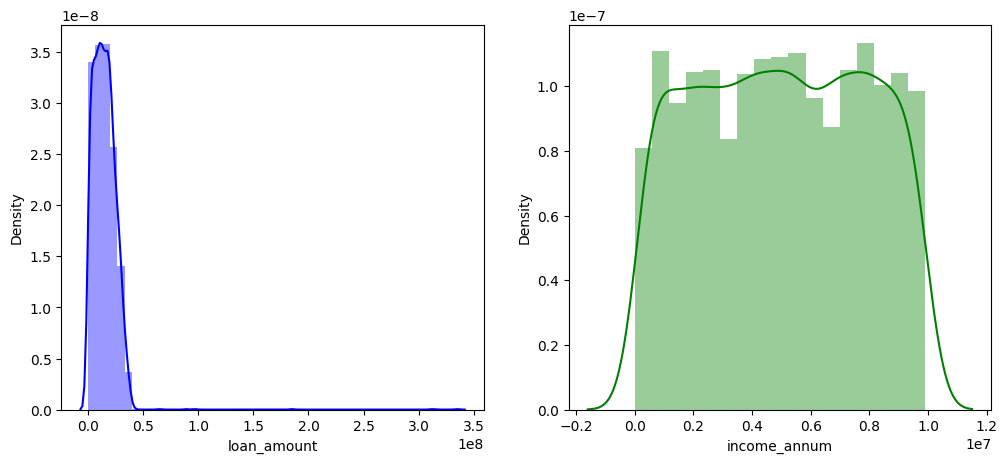

In [4]:
# Uni-Variate Analysis

plt.figure(figsize=(12,5))

plt.subplot(121)
sns.distplot(loan_data['loan_amount'],color='b')

plt.subplot(122)
sns.distplot(loan_data['income_annum'],color='g')

plt.show()

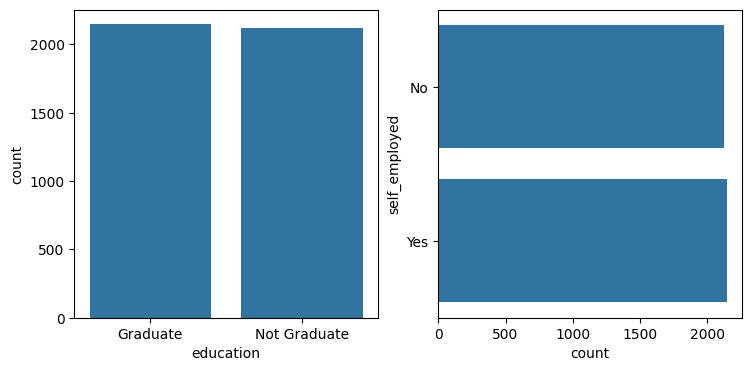

In [5]:
#Bivariate Analysis

plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.countplot(x=loan_data['education'])

plt.subplot(1,4,2)
sns.countplot(loan_data['self_employed'])

plt.show()

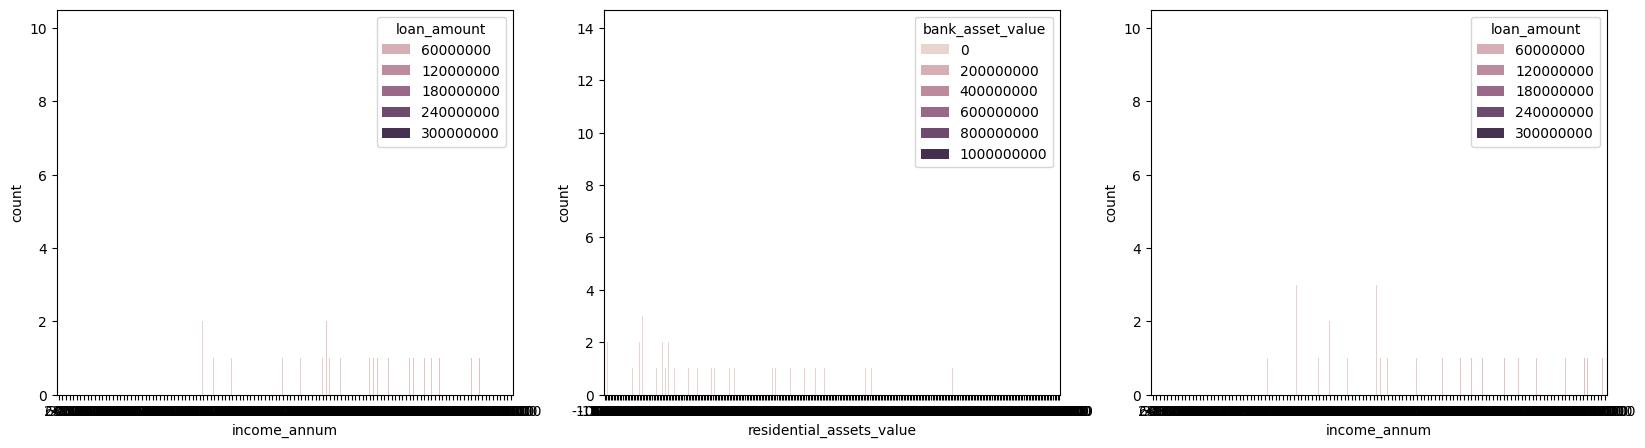

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.countplot(loan_data,x=loan_data['income_annum'],hue=loan_data['loan_amount'])

plt.subplot(132)
sns.countplot(loan_data,x=loan_data['residential_assets_value'],hue=loan_data['bank_asset_value'])

plt.subplot(133)
sns.countplot(loan_data,x=loan_data['income_annum'],hue=loan_data['loan_amount'])

plt.show()

<Axes: xlabel='income_annum', ylabel='loan_amount'>

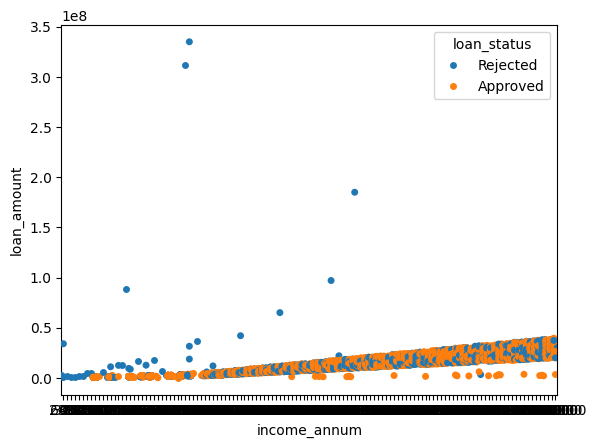

In [7]:
#Multivariate Analysis

sns.swarmplot(loan_data,x=loan_data['income_annum'],y=loan_data['loan_amount'],hue=loan_data['loan_status'])

In [8]:
#Descriptive Analysis

loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.515812,5.006276e+06,1.518384e+07,10.879363,600.523542,7.396409e+06,4.917632e+06,1.490412e+07,5.171929e+06
std,1232.498479,1.746612,2.832358e+06,1.173161e+07,5.738949,172.306837,6.567978e+06,4.543118e+06,9.235261e+06,1.723767e+07
min,1.000000,0.000000,0.000000e+00,5.000000e+04,1.000000,300.000000,-1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,1068.000000,1.000000,2.600000e+06,7.400000e+06,6.000000,454.000000,2.000000e+06,1.300000e+06,7.200000e+06,2.200000e+06
50%,2135.000000,3.000000,5.000000e+06,1.440000e+07,10.000000,600.000000,5.500000e+06,3.600000e+06,1.440000e+07,4.500000e+06
75%,3202.000000,4.000000,7.500000e+06,2.140000e+07,16.000000,748.000000,1.120000e+07,7.600000e+06,2.160000e+07,7.000000e+06
max,4269.000000,20.000000,9.900000e+06,3.350000e+08,30.000000,900.000000,5.000000e+07,8.000000e+07,3.920000e+07,1.110000e+09


In [9]:
# Removing unwanted columns
# Loan ID column is not required

loan_data.drop('loan_id',axis=1,inplace=True)

loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Approved
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
#Checking For Null Values

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [11]:
loan_data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [12]:
# There is no null values

loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Approved
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
# Handling Categorical Values

# Manual encoding

loan_data["education"] = loan_data['education'].map({'Not Graduate': 0,'Graduate': 1})
loan_data["self_employed"] = loan_data['self_employed'].map({'No': 0,'Yes': 1})
loan_data["loan_status"] = loan_data['loan_status'].map({'Rejected': 0,'Approved': 1})


# Now all colums are in dtype int64
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [14]:
loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [15]:
# Balancing The Dataset

from imblearn.combine import SMOTETomek

smote = SMOTETomek(sampling_strategy=0.9)

In [16]:
# Dividing the dataset  into dependent and independent y and x respectively

y = loan_data['loan_status']

x = loan_data.drop(columns=['loan_status'],axis=1)

In [17]:
# creating a new x and y vars for the balanced set

x_bal,y_bal = smote.fit_resample(x,y)

In [18]:
print(y.value_counts())
print(y_bal.value_counts())

loan_status
1    2641
0    1628
Name: count, dtype: int64
loan_status
1    2295
0    2030
Name: count, dtype: int64


In [19]:
# Splitting the dataset  in train and test on balanced dataset

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_bal,y_bal, test_size=0.33, random_state=42)

In [20]:
# MODEL BUILDING
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Decision Tree Model


def decisionTree(x_train,x_test,y_train,y_test):
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  y_pred = dt.predict(x_test)
  print('***DecisionTreeClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

def randomForest(x_train,x_test,y_train,y_test):
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  print('***RandomForest***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

def KNN(x_train,x_test,y_train,y_test):
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  print('***KNN***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

def xgBoost(x_train,x_test,y_train,y_test):
  xg = GradientBoostingClassifier()
  xg.fit(x_train,y_train)
  y_pred = xg.predict(x_test)
  print('***XgBOOST***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))


In [21]:
# printing RandomForest train and test accuracy

randomForest(x_train,x_test,y_train,y_test)

***RandomForest***
Confusion matrix
[[651  33]
 [ 35 709]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       684
           1       0.96      0.95      0.95       744

    accuracy                           0.95      1428
   macro avg       0.95      0.95      0.95      1428
weighted avg       0.95      0.95      0.95      1428



In [22]:
# printing decisionTree train and test accuracy

decisionTree(x_train,x_test,y_train,y_test)

***DecisionTreeClassifier***
Confusion matrix
[[644  40]
 [ 35 709]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       684
           1       0.95      0.95      0.95       744

    accuracy                           0.95      1428
   macro avg       0.95      0.95      0.95      1428
weighted avg       0.95      0.95      0.95      1428



In [23]:
# printing KNN train and test accuracy

KNN(x_train,x_test,y_train,y_test)

***KNN***
Confusion matrix
[[424 260]
 [303 441]]
Classification report
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       684
           1       0.63      0.59      0.61       744

    accuracy                           0.61      1428
   macro avg       0.61      0.61      0.61      1428
weighted avg       0.61      0.61      0.61      1428



In [24]:
# printing xgBoost train and test accuracy

xgBoost(x_train,x_test,y_train,y_test)

***XgBOOST***
Confusion matrix
[[656  28]
 [ 44 700]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       684
           1       0.96      0.94      0.95       744

    accuracy                           0.95      1428
   macro avg       0.95      0.95      0.95      1428
weighted avg       0.95      0.95      0.95      1428



In [25]:
# RandomForest model is selected

model = RandomForestClassifier()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

f1_score(y_pred,y_test,average='weighted')


0.9502816020808269

In [26]:
cv = cross_val_score(model,x,y,cv=5)

np.mean(cv)

0.9569042722887398

In [27]:
# Saving the model using pickle

pickle.dump(model,open('/content/rdf_model.pkl','wb'))